In [108]:
import numpy as np
from random import random
import math
#best_array_small = []
#best_array_big = []
best_std = 1000

distance_light = 80

for k in range (0, 1000):
    array_big = np.zeros([50,100])
    array_small = np.zeros([50,100])
    for light in range(0,15):
        x_coord = int(random()*100)
        y_coord = int(random()*50)
        array_big[y_coord, x_coord] = 1
        array_big[49 - y_coord, x_coord] = 1
        array_big[y_coord, 99 - x_coord] = 1
        array_big[49 - y_coord, 99 - x_coord] = 1
        
        #loop over each "element" in small array that will see light at the given distance
        light_degrees = 50
        r_light_circle = distance_light * math.tan(light_degrees*(math.pi/180))
        #print(r_light_circle)
        for x in range(int(-r_light_circle), int(r_light_circle)):
            for y in range(int(-r_light_circle), int(r_light_circle)):
                distance = x**2 + y**2
                angle = math.atan(distance/distance_light)
                if distance < r_light_circle:
                    intensity = round(math.cos(angle)**3,3)
                    if (0<=(y_coord + y)<50) and (0<=(x_coord + x)<100):
                        array_small[y_coord + y, x_coord + x] += intensity
                        array_small[49 - y_coord - y, x_coord + x] += intensity
                        array_small[y_coord + y, 99 - x_coord - x] += intensity
                        array_small[49 - y_coord - y, 99 - x_coord - x] += intensity
    #print(array_small[0:5,0:5])
    std = array_small[5:45,10:90].std()
    #print(std)
    if std < best_std:
        best_std = std
        best_array_small = array_small
        best_array_big = array_big
        print(best_std)
        
#print(array_small[5:25,10:50])
sns.heatmap(best_array_small)
#sns.heatmap(best_array_big)

0.9145577634812085
0.5910032866607005


KeyboardInterrupt: 

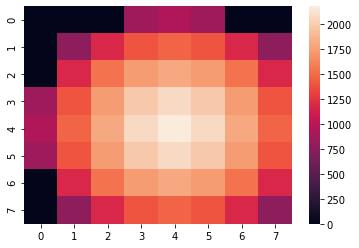

In [4]:
import numpy as np
from random import random
import math
import seaborn as sns


distance_light = 12

#loop over each "element" in small array that will see light at the given distance
light_degrees = 20
r_light_circle = distance_light * math.tan(light_degrees*(math.pi/180))
#print(r_light_circle)
dim_light = int(r_light_circle)
intensities = np.zeros([2*dim_light, 2*dim_light])
for x in range(int(-r_light_circle), int(r_light_circle)):
    for y in range(int(-r_light_circle), int(r_light_circle)):
        distance = math.sqrt(x**2 + y**2)
        angle = math.atan(distance/distance_light)
        angle_deg = angle*180/math.pi
        if distance < r_light_circle:
            intensity = -0.0199*angle_deg**4 + 0.6398*angle_deg**3 - 8.8605*angle_deg**2 + 12.453*angle_deg + 2178.1
            intensities[x + int(-r_light_circle), y + int(-r_light_circle)] = intensity*math.cos(angle)**3
            #round(math.cos(angle)**3,3)
sns.heatmap(intensities)

1501.1072771134534
1493.152829052278
1316.8396486723125
1301.1156333191605
1291.378555204214
1271.780597024894
1137.6617779484561


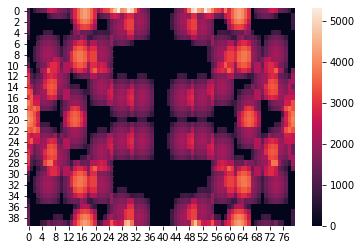

In [7]:
best_std = 10000
for k in range(0, 20000):
    array_big = np.zeros([100,200]) #centre at (49,99)
    array_small = np.zeros([1000,2000]) #centre at (499,999)
    #calc everything for (0,0) and then move by offsets
    offset_y = int(array_small.shape[0]/2-1) #499
    offset_x = int(array_small.shape[1]/2-1) #999
    offset_y_big = int(array_big.shape[0]/2-1) #49
    offset_x_big = int(array_big.shape[1]/2-1) #99
    #print(offset_y, offset_x)
    for light in range(0,30):
        x_coord = int(random()*50) #random x coord for 1 quadrant
        y_coord = int(random()*25) #random y coord for 1 quadrant
        #mark location of light bulbs
        a = offset_y_big + y_coord
        b = offset_x_big + x_coord
        c = offset_x_big - x_coord
        d = offset_y_big - y_coord
        
        array_big[a, b ] = 1
        array_big[a, c] = 1
        array_big[d, b] = 1
        array_big[d, c] = 1
        #sns.heatmap(array_big)
        
        a2 = offset_y + y_coord
        b2 = offset_x + x_coord
        c2 = offset_x - x_coord
        d2 = offset_y - y_coord
        
        #add the intensity matrix on top of existing intensity (small_array)
        #find indices to slice 2d small_array
        array_small[a2-dim_light:a2+dim_light, b2-dim_light:b2+dim_light] += intensities
        array_small[a2-dim_light:a2+dim_light, c2-dim_light:c2+dim_light] += intensities
        array_small[d2-dim_light:d2+dim_light, b2-dim_light:b2+dim_light] += intensities
        array_small[d2-dim_light:d2+dim_light, c2-dim_light:c2+dim_light] += intensities
       
        
        #sns.heatmap(best_array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40])
    std = array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40].std()
    if std < best_std:
        best_std = std
        best_array_small = array_small
        best_array_big = array_big
        print(best_std)
#sns.heatmap(array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40])
sns.heatmap(best_array_small[offset_y-20:offset_y+20,offset_x-40:offset_x+40])
#sns.heatmap(best_array_big)

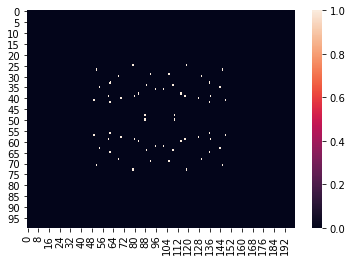

In [411]:
sns.heatmap(best_array_big)
np.savetxt("big_array.csv", best_array_big, delimiter = ",")